<center> 
    <h1> Toronto Crime </h1>
<h3> Sprint 3</h3>
<h3> Basic XG Boost</h3>
    </center>

##### Author: Arsalan Arif Radhu
##### Date: 23 November 2023

### Table of Contents:
- [Introduction](#intro) <br />
- [XGBoost](#xgb)<br />

### Introduction <a id="intro" /> 

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from matplotlib import pyplot as plt

In [3]:
# Importing the data
df = pd.read_csv('../Data/FinalDataAdvAn.csv',index_col=0)
df.reset_index(inplace=True)

In [ ]:
df.shape

(414327, 39)

Dropping the `UCR_CODE` and `UCR_EXT` as I just realized that these indicate which crime type has occurred. Hence, I will be dropping them.

In [4]:
df = df.drop('UCR_CODE', axis=1)
df = df.drop('UCR_EXT', axis=1)

In [ ]:
df.columns

Index(['OBJECTID', 'CRIME_TYPE', 'REPORT_YEAR', 'REPORT_MONTH', 'REPORT_DAY',
       'OCC_YEAR', 'OCC_MONTH', 'OCC_DAY', 'LONG_WGS84', 'LAT_WGS84', 'DEATH',
       'INJURIES', 'D11', 'D12', 'D13', 'D14', 'D22', 'D23', 'D31', 'D32',
       'D33', 'D41', 'D42', 'D43', 'D51', 'D52', 'D53', 'D55', 'NSA',
       'Apartment', 'Commercial', 'Educational', 'House', 'NotApplicable',
       'Other', 'Outside', 'Transit'],
      dtype='object')

In [ ]:
df.sample(10)

,OBJECTID,CRIME_TYPE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,OCC_YEAR,OCC_MONTH,OCC_DAY,LONG_WGS84,LAT_WGS84,...,D55,NSA,Apartment,Commercial,Educational,House,NotApplicable,Other,Outside,Transit
117299,128510,0,2020,10,6,2020,10,6,-79.199469,43.765441,...,0,0,1,0,0,0,0,0,0,0
278015,47732,5,2019,6,11,2019,6,9,-79.344687,43.687372,...,1,0,0,0,0,0,0,0,1,0
33045,36295,0,2016,1,30,2016,1,30,-79.253430,43.737863,...,0,0,0,0,1,0,0,0,0,0
150636,164710,0,2022,8,14,2022,8,14,-79.446110,43.640305,...,0,0,0,0,0,0,0,0,1,0
128906,141092,0,2021,6,24,2021,6,24,-79.423550,43.639717,...,0,0,0,1,0,0,0,0,0,0
332834,24574,3,2020,8,16,2020,8,16,-79.358869,43.676196,...,1,0,0,1,0,0,0,0,0,0
56737,62162,0,2017,6,12,2017,6,12,-79.438787,43.756785,...,0,0,1,0,0,0,0,0,0,0
9239,10174,0,2014,8,15,2014,7,31,-79.281937,43.798033,...,0,0,0,0,0,1,0,0,0,0
378586,26695,1,2017,11,20,2017,11,20,-79.271107,43.767919,...,0,0,0,1,0,0,0,0,0,0
288881,58614,5,2020,6,8,2020,6,7,-79.411614,43.685692,...,0,0,0,0,0,0,0,0,1,0


## XGBoost <a id="xgb" /> 

I am opting for the XGBoost model due to its proven track record of delivering robust and accurate predictions across diverse datasets. Its capacity to handle intricate relationships within the data, coupled with effective regularization techniques, makes it particularly adept at preventing overfitting—a crucial consideration for maintaining model generalization. Furthermore, XGBoost's efficiency in handling large datasets ensures scalability, providing a practical solution for the complexities inherent in my specific task. The algorithm's feature importance analysis also enhances interpretability, allowing for a deeper understanding of the factors influencing predictions.

In [ ]:
# Extract features and labels
X_boost = df.drop('CRIME_TYPE', axis=1)  # Replace 'label_column' with the actual label column name
y_boost = df['CRIME_TYPE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_boost, y_boost, test_size=0.3, random_state=50)

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier()

# Train the model
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.9916411234201401
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47661
           1       1.00      1.00      1.00     18931
           2       0.98      0.96      0.97       397
           3       0.95      0.93      0.94      7818
           4       0.99      1.00      0.99      1735
           5       0.99      0.99      0.99     47757

    accuracy                           0.99    124299
   macro avg       0.99      0.98      0.98    124299
weighted avg       0.99      0.99      0.99    124299



The XGBoost model demonstrates outstanding performance with an accuracy of 99.16% on the evaluation dataset. Across various classes, precision and recall metrics consistently exceed 0.95, indicating exceptional predictive capability. <br />
But even then accuracy of 99% is too high. So I'll will check which features are being used to do the prediction.

In [ ]:
# Get feature importances
feature_importances = xgb_classifier.feature_importances_

# Pair feature names with their importance s}cores
feature_importance_dict = dict(zip(X_boost.columns, feature_importances))

# Print or plot feature importances
print(feature_importance_dict)

{'OBJECTID': 0.08373778, 'REPORT_YEAR': 0.09533304, 'REPORT_MONTH': 0.017951932, 'REPORT_DAY': 0.003390534, 'OCC_YEAR': 0.06605712, 'OCC_MONTH': 0.0074153733, 'OCC_DAY': 0.00484835, 'LONG_WGS84': 0.0027976753, 'LAT_WGS84': 0.0023270245, 'DEATH': 0.0035431448, 'INJURIES': 0.009268323, 'D11': 0.0004939174, 'D12': 0.0023801178, 'D13': 0.000877112, 'D14': 0.0009960928, 'D22': 0.00068212516, 'D23': 0.0015137354, 'D31': 0.0012506641, 'D32': 0.0019903206, 'D33': 0.0010271921, 'D41': 0.0009903664, 'D42': 0.0013517397, 'D43': 0.0014315811, 'D51': 0.00089848397, 'D52': 0.012363356, 'D53': 0.0051767672, 'D55': 0.00079247, 'NSA': 0.0039676195, 'Apartment': 0.021988822, 'Commercial': 0.016452007, 'Educational': 0.0049081603, 'House': 0.082251064, 'NotApplicable': 0.18720573, 'Other': 0.08838058, 'Outside': 0.24401943, 'Transit': 0.019940272}


Creating a visual for easy readability.

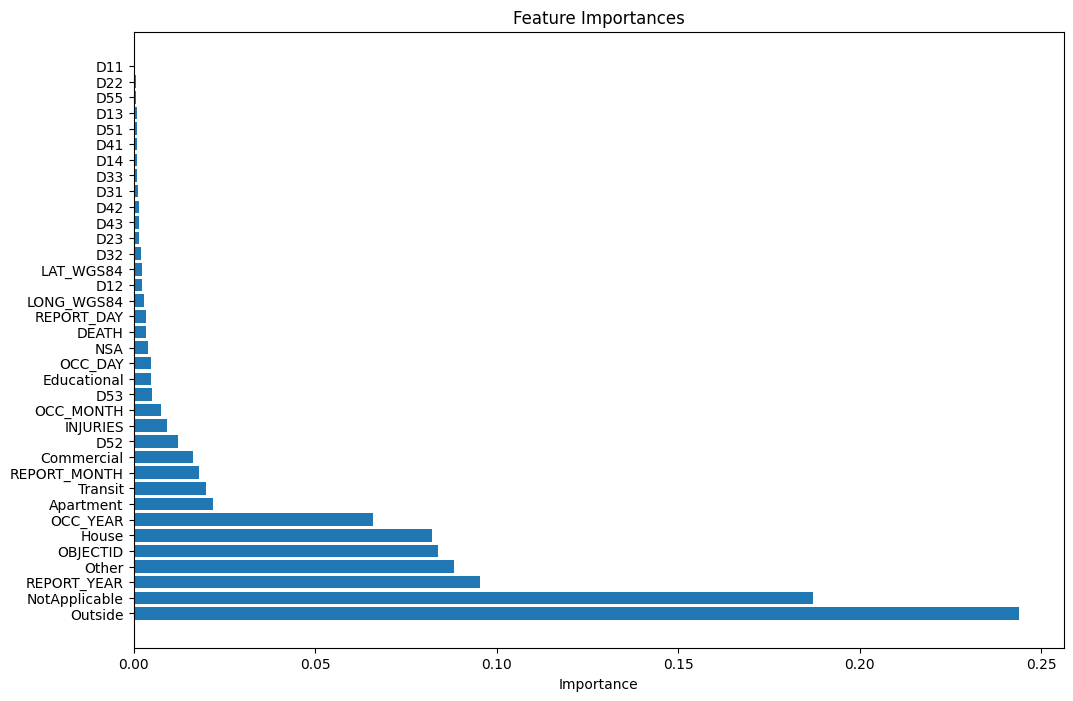

In [ ]:
importance_df = pd.DataFrame(list(feature_importance_dict.items()), columns=['Feature', 'Importance'])

# Sort the DataFrame by Importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

Everything looks alright but I am not I don't think `OBJECTID` is a feature I wished to have in my data set.  

After looking into it more, I found out that due to the way I had concatenated my data set, it created a very predictable patern with the `OBJECTID` which I was unaware of. I will be dropping the column and then rerun the models. Another thing I realized that I had not randomize my data set, which I will be doing going forward.

In [5]:
df.to_csv('../Data/FixedFinalDataAdvAn.csv')